In [1]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from mpl_toolkits.mplot3d import Axes3D, axes3d
%matplotlib inline

In [2]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [3]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [4]:
path="/home/ucfilho/Documents/Aulas/ANN_out_17_2018"
os.chdir(path)

In [5]:
DAT=pd.read_csv("Polimero_maio_21_2015.txt",sep='\t')
print(DAT.head())

   Time     TC     Y  MI    MW
0  80.0  170.0  76.5  62  2940
1  80.0  180.0  77.0  60  3470
2  90.0  170.0  78.0  66  3680
3  90.0  180.0  79.5  59  3890
4  85.0  175.0  79.9  72  3480


In [6]:
# separa as colunas de interesse
Index=range(5)
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()

In [7]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [8]:
# separa os dados em treino e teste
train=DAT.sample(frac=1.0,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)

In [9]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1]]
x_test=test.iloc[:,[0,1]]
X_OLD=DAT_OLD.iloc[:,[0,1]]

In [10]:
# obtem as variaveis dependentes (treino e teste)
Index=[2,3,4]
Y_OLD=DAT_OLD.iloc[:,Index]
Index=[2] # Y as feature
y_train_Y=train.iloc[:,Index]
y_test__Y=test.iloc[:,Index]
Y_OLD_Y=DAT_OLD.iloc[:,Index]
Index=[3] # MI as feature
y_train_MI=train.iloc[:,Index]
y_test__MI=test.iloc[:,Index]
Y_OLD_MI=DAT_OLD.iloc[:,Index]
Index=[4] # Y as feature
y_train_MW=train.iloc[:,Index]
y_test_MW=test.iloc[:,Index]
Y_OLD_MW=DAT_OLD.iloc[:,Index]
print(Y_OLD.head())

      Y  MI    MW
0  76.5  62  2940
1  77.0  60  3470
2  78.0  66  3680
3  79.5  59  3890
4  79.9  72  3480


In [11]:
# define a rede neural Y
Neuron=12
clf_Y = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(Neuron), 
                    random_state=1)

In [12]:
# define a rede neural MI
Neuron=12
clf_MI = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(Neuron), 
                    random_state=1)

In [13]:
# define a rede neural MW
Neuron=12
clf_MW = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(Neuron), 
                    random_state=1)

In [14]:
# treina a rede neural Y
clf_Y.fit(x_train, y_train_Y)

/usr/lib64/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [15]:
# treina a rede neural MI
clf_MI.fit(x_train, y_train_MI)

/usr/lib64/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [16]:
# treina a rede neural MW
clf_MW.fit(x_train, y_train_MW)

/usr/lib64/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=12, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [17]:
# usa a rede neural treina em calculos para treino e teste Y
y_calc_train=clf_Y.predict(x_train)
x_test=x_train
y_calc_test=clf_Y.predict(x_test)


In [18]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(Y_OLD_Y)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [19]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD_Y)
y_calc_test=Original(y_calc_test,Y_OLD_Y)
#print(y_calc_train)
#print(Y_OLD_Y)

[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]
[[-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]]
[[56.6522 66.3155 70.4746 69.1295 62.2802]
 [63.387  73.0503 77.2094 75.8643 69.015 ]
 [66.1176 75.7809 79.94   78.5949 71.7456]
 [64.844  74.5073 78.6664 77.3213 70.472 ]
 [59.5662 69.2295 73.3886 72.0435 65.1942]]


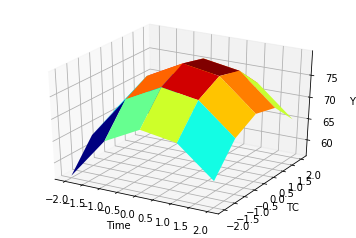

In [20]:
def f(Time, TC):
    return 79.9400+1.4070*Time+0.7285*TC-2.7521*Time**2-2.0021*TC**2

x = np.linspace(-2, 2, 5)
y = np.linspace(-2, 2, 5)

X, Y = np.meshgrid(x, y)
print(X)
print(Y)
Z = f(X, Y)
print(Z)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel('Time')
ax.set_ylabel('TC')
ax.set_zlabel('Y');

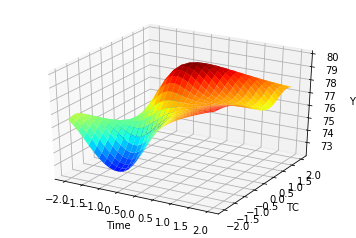

In [21]:
Num=30
x = np.linspace(-2, 2, Num)
y = np.linspace(-2, 2, Num)

X, Y = np.meshgrid(x, y)
df = pd.DataFrame({'Time':Y.flatten(), 'TC':X.flatten()})
Z=[]
Z=clf_Y.predict(df)
Z=pd.DataFrame(Z)
col_names=list(Y_OLD_Y)
Z.columns = col_names
Z=Original(Z,Y_OLD_Y)
Z=Z.values
Z=Z.reshape(Num,Num)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel('Time')
ax.set_ylabel('TC')
ax.set_zlabel('Y');

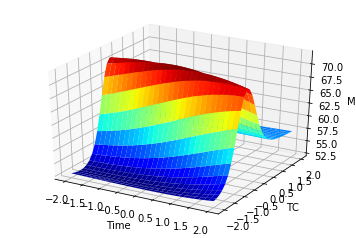

In [22]:
Num=30
x = np.linspace(-2, 2, Num)
y = np.linspace(-2, 2, Num)

X, Y = np.meshgrid(x, y)
df = pd.DataFrame({'Time':Y.flatten(), 'TC':X.flatten()})
Z=[]
Z=clf_MI.predict(df)
Z=pd.DataFrame(Z)
col_names=list(Y_OLD_MI)
Z.columns = col_names
Z=Original(Z,Y_OLD_MI)
Z=Z.values
Z=Z.reshape(Num,Num)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel('Time')
ax.set_ylabel('TC')
ax.set_zlabel('Mi');

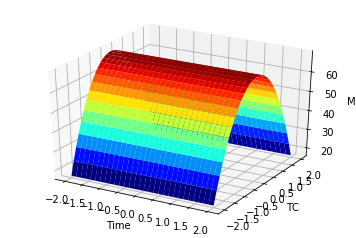

In [23]:
def f(Time, TC):
    return 69.5222-13.1952*TC**2

x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel('Time')
ax.set_ylabel('TC')
ax.set_zlabel('MI');

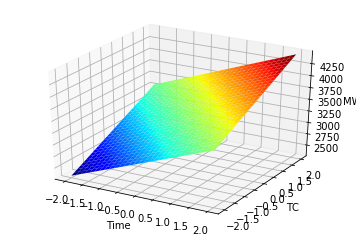

In [24]:
def f(Time, TC):
    return 3386.1538+290.0481*Time+250.7966*TC

x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel('Time')
ax.set_ylabel('TC')
ax.set_zlabel('MW');

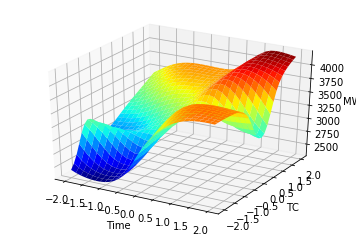

In [25]:
Num=30
x = np.linspace(-2, 2, Num)
y = np.linspace(-2, 2, Num)

X, Y = np.meshgrid(x, y)
df = pd.DataFrame({'Time':Y.flatten(), 'TC':X.flatten()})
Z=[]
Z=clf_MW.predict(df)
Z=pd.DataFrame(Z)
col_names=list(Y_OLD_MW)
Z.columns = col_names
Z=Original(Z,Y_OLD_MW)
Z=Z.values
Z=Z.reshape(Num,Num)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel('Time')
ax.set_ylabel('TC')
ax.set_zlabel('MW');

In [26]:
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

def D_Desirability(y,U,T,L):
    if y.all()<L:
        d=0
    if (y.all()>=L)&(y<=T):
        d=(y-L)/(T-L)
    if (y.all()>=T)&(y<+U):
        d=(U-y)/(U-T)
    if (y.all()>U):
        d=0
    return d

def Desirability(y,U,T,L):
    if y.item()<L:
        d=0
    if (y.item()>=L)&(y<=T):
        d=(y-L)/(T-L)
    if (y.item()>=T)&(y<+U):
        d=(U-y)/(U-T)
    if (y.item()>U):
        d=0
    return d

In [27]:
print("hello world,I am evolving!!!")

hello world,I am evolving!!!


In [28]:
def function(x):
    global clf_Y,clf_MI,clf_MW,OLD
    Num=int(x.size/2)
    x=x.reshape(Num,2)
    
    df = pd.DataFrame(x)
    col_names=['x','y']
    df.columns = col_names
    MW=clf_MW.predict(df)
    MI=clf_MI.predict(df)
    Y=clf_Y.predict(df)
    
    OLD_MI=OLD[['MI']]
    OLD_Y=OLD[['Y']]
    OLD_MW=OLD[['MW']]
    
    Y=pd.DataFrame(Y)
    MW=pd.DataFrame(MW)
    MI=pd.DataFrame(MI)
    
    Y.columns=list(OLD_Y)
    MW.columns=list(OLD_MW)
    MI.columns=list(OLD_MI)
    
    Y=Original(Y,Y_OLD_Y)
    MW=Original(MW,Y_OLD_MW)
    MI=Original(MI,Y_OLD_MI)
    
    Y=np.array(np.squeeze(Y))
    MI=np.array(np.squeeze(MI))
    MW=np.array(np.squeeze(MW))
    
    U=3890
    T=3400
    L=2940
    d1 = Desirability(MW,U,T,L)

    U=68
    T=65
    L=62
    d2 = Desirability(MI,U,T,L)

    U=80
    T=77.5
    L=75.6
    d3 =  Desirability(Y,U,T,L)

    d=(-1)*(d1*d2*d3)**(1/3)
    fun=d
    
    return fun



In [29]:
bounds = [(-2, 2),(-2, 2)]
OLD=Y_OLD
ret = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=200, popsize=100,recombination=0.5)

In [30]:
print("global minimum: x = ",ret.x, "f(x0) = ",ret.fun)

global minimum: x =  [-0.64371284  0.33894937] f(x0) =  -0.9304820504030478


In [31]:
# funcao retorna os dados a forma original
def Descodifica(x,x_old,strings):
    k=0
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[k]=x[k]*b+a
        k=k+1
    return x

In [32]:
strings=['Time','TC']
DAT=pd.read_csv("Polimero_maio_21_2015.txt",sep='\t')
xcalc=[]
xcalc=Descodifica(ret.x,DAT,strings).copy()
print("global minimum: x = ",xcalc, "f(x0) = ",ret.fun)

global minimum: x =  [ 80.44895024 177.39637202] f(x0) =  -0.9304820504030478


PS: no planejamento de experimentos utilizando o Statistica -e-papers
Y=80
MI=65,044
MW=3586,1

tempo=86,65 e Temperatura=178,77